In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


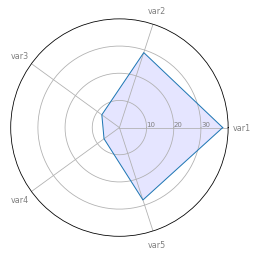

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

values = [38,29,8,7,28]
N = len(values)
values+=values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
ax = plt.subplot(111, polar=True)
 
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)

ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)


In [30]:
df = pd.read_csv("StudyEventTimeSeries.csv")

In [31]:
codelist = list(set(df.as_matrix().flatten()))
codelist.remove(np.nan)

actionOnly= list(filter(lambda x: x.isupper(),codelist))
featureOnly= list(filter(lambda x: x.islower(),codelist))

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [32]:


df = df.stack().reset_index()

df = df.rename(columns={
    "level_0":"t",
    "level_1":"user",
    0:"Feature"
})
df = df[df.Feature.isin(featureOnly)]
df['subject'] = df['user'].apply(lambda x: {'A':'astro', 'G':'genetics', 'M':'material science'}[x[0]])
df_frequency_by_subject_feature = df.groupby(["subject","Feature"]).count()["t"].reset_index().rename(columns={"t":"Usage Frequency"})


In [36]:
feature_lst= ['sketch-to-query','sketch-to-modify','input-equation','smoothing','ignore-xrange','brush-xrange',
              'filter','dynamic-class','pattern-upload','drag-and-drop','representative-outlier',
              'change-axis', 'change-metric','change-number-of-results','control-kmeans-clustersize', 'min-similarity-cutoff','show-scatter', 'upload-dataset','reverse-y']

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


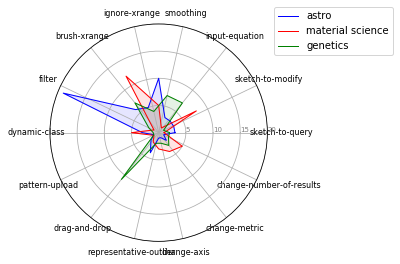

In [128]:
df_frequency_by_subject_feature = df.groupby(["subject","Feature"]).count()["t"].reset_index().rename(columns={"t":"Usage Frequency"})
#sort based on the order of component list
df_frequency_by_subject_feature.Feature = df_frequency_by_subject_feature.Feature.astype("category")
df_frequency_by_subject_feature.Feature.cat.set_categories(component_lst,inplace=True)

for subject,color in zip(["astro","material science","genetics"],["blue","red","green"]):
    df_frequency_subject_feature = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]==subject].sort_values("Feature")

    values = list(df_frequency_subject_feature["Usage Frequency"])
    N = len(values)
    values+=values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], feature_lst, color='black', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([5,10,15,20], ["5","10","15","20"], color="grey", size=7)
    plt.ylim(0,20)

    ax.plot(angles, values, linewidth=1, linestyle='solid',color=color,label=subject)
    ax.fill(angles, values, 'b', alpha=0.1,color=color)
plt.legend(loc="upper right",bbox_to_anchor=(1.6, 1.1))

# plt.gcf().canvas.draw()
# angles = np.linspace(0,2*np.pi,len(ax.get_xticklabels())+1)
# angles[np.cos(angles) < 0] = angles[np.cos(angles) < 0] + np.pi
# angles = np.rad2deg(angles)
# labels = []
# for label, angle in zip(ax.get_xticklabels(), angles):
#     x,y = label.get_position()
#     lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
#                   ha=label.get_ha(), va=label.get_va())
#     lab.set_rotation(angle)
#     labels.append(lab)
# ax.set_xticklabels([])

In [37]:
component_dict = {
     'pattern-upload':'concept-query',
     'sketch-to-modify':'exact-specification',
     'drag-and-drop':'result-querying',
     'change-metric':'flexible-matching',
     'filter':'filter-selection',
     'brush-xrange':'range-selection',
     'min-similarity-cutoff':'control',
     'smoothing':'approx-shape-specification',
     'ignore-xrange':'approx-shape-specification',
     'representative-outlier':'recommendation',
     'dynamic-class':'group-comparison',
     'sketch-to-query':'exact-specification',
     'reverse-y':'control',
     'input-equation':'exact-specification',
     'upload-dataset':'control',
     'show-scatter':'control',
     'export':'control',
     'change-number-of-results':'control',
     'control-kmeans-clustersize':'recommendation',
     'change-axis':'control'
}

In [38]:
df_component = df
df_component["Component"] = df["Feature"].replace(component_dict)

df_frequency_by_subject_feature = df.groupby(["subject","Component"]).count()["t"].reset_index().rename(columns={"t":"Usage Frequency"})

df_frequency_by_subject_feature = df_frequency_by_subject_feature[df_frequency_by_subject_feature["Component"]!="control"]

In [42]:
component_lst = ['exact-specification','approx-shape-specification','range-selection','flexible-matching',
    'filter-selection','group-comparison',
    'concept-query', 'result-querying','recommendation','control']

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


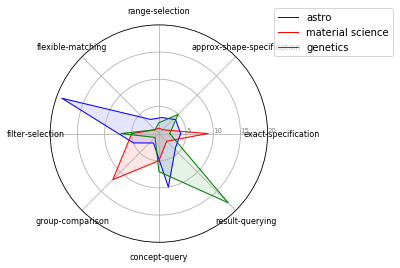

In [121]:
#sort based on the order of component list
df_frequency_by_subject_feature.Component = df_frequency_by_subject_feature.Component.astype("category")
df_frequency_by_subject_feature.Component.cat.set_categories(component_lst,inplace=True)

for subject,color in zip(["astro","material science","genetics"],["blue","red","green"]):
    df_frequency_subject_feature = df_frequency_by_subject_feature[df_frequency_by_subject_feature["subject"]==subject].sort_values("Component")

    values = list(df_frequency_subject_feature["Usage Frequency"])
    N = len(values)
    values+=values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], component_lst, color='black', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([5,10,15,20], ["5","10","15","20"], color="grey", size=7)
    plt.ylim(0,20)

    ax.plot(angles, values, linewidth=1, linestyle='solid',color=color,label=subject)
    ax.fill(angles, values, 'b', alpha=0.1,color=color)
plt.legend(loc="upper right",bbox_to_anchor=(1.6, 1.1))

# plt.gcf().canvas.draw()
# angles = np.linspace(0,2*np.pi,len(ax.get_xticklabels())+1)
# angles[np.cos(angles) < 0] = angles[np.cos(angles) < 0] + np.pi
# angles = np.rad2deg(angles)
# labels = []
# for label, angle in zip(ax.get_xticklabels(), angles):
#     x,y = label.get_position()
#     lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
#                   ha=label.get_ha(), va=label.get_va())
#     lab.set_rotation(angle)
#     labels.append(lab)
# ax.set_xticklabels([])

Plot PEN based on encoding: 
P = 1
E = 0.5
N = 0

In [129]:
df = pd.read_csv("PENFeature.csv").fillna(0)
user_idxs = 9 # user index up to 9th user
cols = list(df.columns)
cols.remove("User ID")
fdf = df[cols].ix[:user_idxs-1]

fdf[fdf=="P"]=2
fdf[fdf=="E"]=1
fdf[fdf=="N"]=-1

fdfarr=fdf.as_matrix().astype(int)

In [233]:
subject =["astro","genetics","matsci"]

In [234]:
fdfarr=fdfarr.T

In [235]:
def get_bottom_up(arr):
    return arr[-3:]

In [236]:
def get_context(arr):
    return arr[7:-3]

In [237]:
def get_top_down(arr):
    return arr[:7]

In [238]:
def get_astro(arr):
    return arr[:,:3]

In [239]:
def get_genetics(arr):
    return arr[:,3:6]

In [240]:
def get_matsci(arr):
    return arr[:,6:]

In [241]:
topdownsum = get_top_down(fdfarr).sum()
contextsum = get_context(fdfarr).sum()
bottomupsum = get_bottom_up(fdfarr).sum()

In [242]:
astro_val = [get_top_down(get_astro(fdfarr)).sum()/topdownsum,get_context(get_astro(fdfarr)).sum()/contextsum,get_bottom_up(get_astro(fdfarr)).sum()/bottomupsum]
genetics_val = [get_top_down(get_genetics(fdfarr)).sum()/topdownsum,get_context(get_genetics(fdfarr)).sum()/contextsum,get_bottom_up(get_genetics(fdfarr)).sum()/bottomupsum]
matsci_val = [get_top_down(get_matsci(fdfarr)).sum()/topdownsum,get_context(get_matsci(fdfarr)).sum()/contextsum,get_bottom_up(get_matsci(fdfarr)).sum()/bottomupsum]

[0.4020618556701031, 0.35294117647058826, 0.3064516129032258]
[0.3402061855670103, 0.2647058823529412, 0.3870967741935484]
[0.25773195876288657, 0.38235294117647056, 0.3064516129032258]


/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


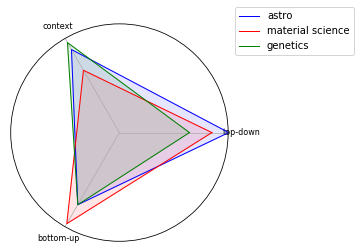

In [243]:
for subject,values , color in zip(["astro","material science","genetics"],[astro_val,matsci_val,genetics_val],["blue","red","green"]):
    print (values)
    N = len(values)
    values+=values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], ["top-down","context","bottom-up"], color='black', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([0.5,1], ["0.5","1"], color="grey", size=7)
    plt.ylim(0,0.4)

    ax.plot(angles, values, linewidth=1, linestyle='solid',color=color,label=subject)
    ax.fill(angles, values, 'b', alpha=0.1,color=color)
plt.legend(loc="upper right",bbox_to_anchor=(1.6, 1.1))

# plt.gcf().canvas.draw()
# angles = np.linspace(0,2*np.pi,len(ax.get_xticklabels())+1)
# angles[np.cos(angles) < 0] = angles[np.cos(angles) < 0] + np.pi
# angles = np.rad2deg(angles)
# labels = []
# for label, angle in zip(ax.get_xticklabels(), angles):
#     x,y = label.get_position()
#     lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
#                   ha=label.get_ha(), va=label.get_va())
#     lab.set_rotation(angle)
#     labels.append(lab)
# ax.set_xticklabels([])

No normalization

[39, 24, 19]
[33, 18, 24]
[25, 26, 19]


/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


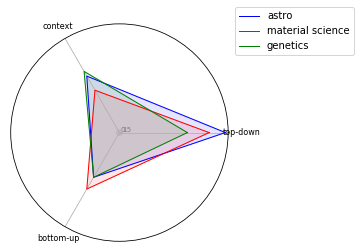

In [246]:
astro_val = [get_top_down(get_astro(fdfarr)).sum(),get_context(get_astro(fdfarr)).sum(),get_bottom_up(get_astro(fdfarr)).sum()]
genetics_val = [get_top_down(get_genetics(fdfarr)).sum(),get_context(get_genetics(fdfarr)).sum(),get_bottom_up(get_genetics(fdfarr)).sum()]
matsci_val = [get_top_down(get_matsci(fdfarr)).sum(),get_context(get_matsci(fdfarr)).sum(),get_bottom_up(get_matsci(fdfarr)).sum()]
for subject,values , color in zip(["astro","material science","genetics"],[astro_val,matsci_val,genetics_val],["blue","red","green"]):
    print (values)
    N = len(values)
    values+=values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], ["top-down","context","bottom-up"], color='black', size=8)

    ax.set_rlabel_position(0)
    plt.yticks([0.5,1], ["0.5","1"], color="grey", size=7)
    plt.ylim(0,40)

    ax.plot(angles, values, linewidth=1, linestyle='solid',color=color,label=subject)
    ax.fill(angles, values, 'b', alpha=0.1,color=color)
plt.legend(loc="upper right",bbox_to_anchor=(1.6, 1.1))

# plt.gcf().canvas.draw()
# angles = np.linspace(0,2*np.pi,len(ax.get_xticklabels())+1)
# angles[np.cos(angles) < 0] = angles[np.cos(angles) < 0] + np.pi
# angles = np.rad2deg(angles)
# labels = []
# for label, angle in zip(ax.get_xticklabels(), angles):
#     x,y = label.get_position()
#     lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
#                   ha=label.get_ha(), va=label.get_va())
#     lab.set_rotation(angle)
#     labels.append(lab)
# ax.set_xticklabels([])

In [247]:
astro_val = [get_top_down(get_astro(fdfarr)).sum(),get_context(get_astro(fdfarr)).sum(),get_bottom_up(get_astro(fdfarr)).sum()]
genetics_val = [get_top_down(get_genetics(fdfarr)).sum(),get_context(get_genetics(fdfarr)).sum(),get_bottom_up(get_genetics(fdfarr)).sum()]
matsci_val = [get_top_down(get_matsci(fdfarr)).sum(),get_context(get_matsci(fdfarr)).sum(),get_bottom_up(get_matsci(fdfarr)).sum()]

In [252]:
df_theme =pd.DataFrame([astro_val,genetics_val,matsci_val],columns= ["top-down","context","bottom-up"])

In [253]:
import altair as alt

In [257]:
df_theme["User"]=["astro","genetics","matsci"]

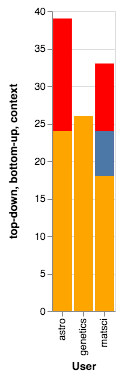

In [264]:
alt.Chart(df_theme).mark_bar(color="red").encode(
    x="User",
    y="top-down"
)+alt.Chart(df_theme).mark_bar().encode(
    x="User",
    y="bottom-up"
)+alt.Chart(df_theme).mark_bar(color="orange").encode(
    x="User",
    y="context"
)


In [270]:
df = pd.read_csv("PENFeature.csv").fillna(0)
user_idxs = 9 # user index up to 9th user
cols = list(df.columns)
cols.remove("User ID")
fdf = df[cols].ix[:user_idxs-1]

fdf[fdf=="P"]=1
fdf[fdf=="E"]=0
fdf[fdf=="N"]=-1
fdf["Subject"]=["astro","astro","astro","matsci","matsci","matsci","genetics","genetics","genetics"]
# fdfarr=fdf.as_matrix().astype(int)

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [302]:
fdf_freq= fdf.groupby("Subject").sum().reset_index()

In [304]:
fdf_freq = fdf_freq.unstack().reset_index()[3:].rename(columns={
    "level_0":"Feature",
    "level_1":"Subject",
    0:"Practicality"
})

In [308]:
fdf_freq.ix[fdf_freq["Subject"]==0,"Subject"]="astro"
fdf_freq.ix[fdf_freq["Subject"]==1,"Subject"]="matsci"
fdf_freq.ix[fdf_freq["Subject"]==2,"Subject"]="genetics"

/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/dorislee/.virtualenvs/py37env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

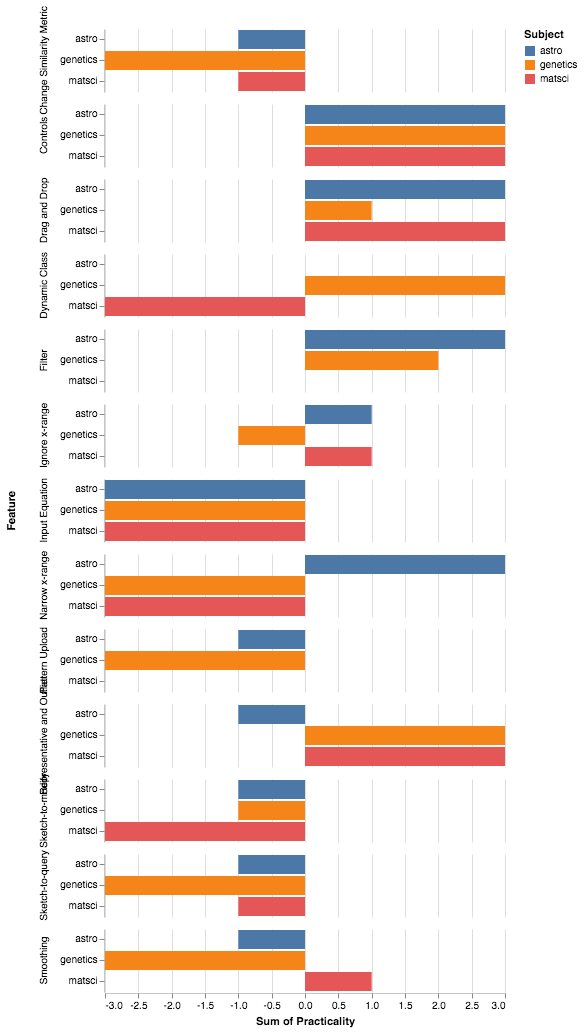

In [334]:
alt.Chart(fdf_freq).mark_bar().encode( 
    row=alt.Row("Feature"),
    x= alt.X("Practicality",aggregate="sum"),
    y= alt.Y("Subject",title=""),
    color = alt.Color("Subject")
).configure_view(
    stroke='transparent'
).configure_axis(
    domainWidth=0.5
)

In [342]:
fdf_freq["Component"] = fdf_freq["Feature"].replace(component_dict)

In [343]:
fdf_freq

,Feature,Subject,Practicality,Component
3,Sketch-to-query,astro,-1,Sketch-to-query
4,Sketch-to-query,matsci,-1,Sketch-to-query
5,Sketch-to-query,genetics,-3,Sketch-to-query
6,Sketch-to-modify,astro,-1,Sketch-to-modify
7,Sketch-to-modify,matsci,-3,Sketch-to-modify
8,Sketch-to-modify,genetics,-1,Sketch-to-modify
9,Input Equation,astro,-3,Input Equation
10,Input Equation,matsci,-3,Input Equation
11,Input Equation,genetics,-3,Input Equation
12,Smoothing,astro,-1,Smoothing


In [341]:
fdf_freq.groupby(["Component","Subject"])["Practicality"].sum().reset_index()

,Component,Subject,Practicality
0,Change Similarity Metric,astro,-1
1,Change Similarity Metric,genetics,-3
2,Change Similarity Metric,matsci,-1
3,Controls,astro,3
4,Controls,genetics,3
5,Controls,matsci,3
6,Drag and Drop,astro,3
7,Drag and Drop,genetics,1
8,Drag and Drop,matsci,3
9,Dynamic Class,astro,0
